http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,-0.689370,1.096406,-0.494354,-0.859134
2013-01-02,0.018929,1.920100,0.623019,1.038636
2013-01-03,-0.808062,-0.177087,0.366129,0.222687
2013-01-04,0.114734,2.072743,-2.259162,1.458354
2013-01-05,-0.577031,0.377957,0.077825,0.157472
2013-01-06,0.165202,0.278175,-0.065796,0.860848


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.689370,1.096406,-0.494354,-0.859134
2013-01-02,0.018929,1.920100,0.623019,1.038636
2013-01-03,-0.808062,-0.177087,0.366129,0.222687
2013-01-04,0.114734,2.072743,-2.259162,1.458354
2013-01-05,-0.577031,0.377957,0.077825,0.157472


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.114734,2.072743,-2.259162,1.458354
2013-01-05,-0.577031,0.377957,0.077825,0.157472
2013-01-06,0.165202,0.278175,-0.065796,0.860848


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.68937007,  1.096406  , -0.49435442, -0.8591336 ],
       [ 0.01892855,  1.9201005 ,  0.62301861,  1.03863626],
       [-0.808062  , -0.17708726,  0.36612889,  0.22268724],
       [ 0.11473416,  2.07274317, -2.25916216,  1.4583543 ],
       [-0.57703071,  0.37795705,  0.0778249 ,  0.15747164],
       [ 0.16520235,  0.27817527, -0.0657957 ,  0.86084828]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.295933,0.928049,-0.292057,0.479811
std,0.441931,0.924024,1.036244,0.821926
min,-0.808062,-0.177087,-2.259162,-0.859134
25%,-0.661285,0.303121,-0.387215,0.173776
50%,-0.279051,0.737182,0.006015,0.541768
75%,0.090783,1.714177,0.294053,0.994189
max,0.165202,2.072743,0.623019,1.458354


Transposing your data

In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.689370,0.018929,-0.808062,0.114734,-0.577031,0.165202
B,1.096406,1.920100,-0.177087,2.072743,0.377957,0.278175
C,-0.494354,0.623019,0.366129,-2.259162,0.077825,-0.065796
D,-0.859134,1.038636,0.222687,1.458354,0.157472,0.860848


Sorting by an axis

In [20]:
df.sort_index(axis='columns', ascending=False)

,D,C,B,A
2013-01-01,-0.859134,-0.494354,1.096406,-0.689370
2013-01-02,1.038636,0.623019,1.920100,0.018929
2013-01-03,0.222687,0.366129,-0.177087,-0.808062
2013-01-04,1.458354,-2.259162,2.072743,0.114734
2013-01-05,0.157472,0.077825,0.377957,-0.577031
2013-01-06,0.860848,-0.065796,0.278175,0.165202


Sorting by value

In [21]:
df.sort_values(by='C')

,A,B,C,D
2013-01-04,0.114734,2.072743,-2.259162,1.458354
2013-01-01,-0.689370,1.096406,-0.494354,-0.859134
2013-01-06,0.165202,0.278175,-0.065796,0.860848
2013-01-05,-0.577031,0.377957,0.077825,0.157472
2013-01-03,-0.808062,-0.177087,0.366129,0.222687
2013-01-02,0.018929,1.920100,0.623019,1.038636


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01   -0.689370
2013-01-02    0.018929
2013-01-03   -0.808062
2013-01-04    0.114734
2013-01-05   -0.577031
2013-01-06    0.165202
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.689370,1.096406,-0.494354,-0.859134
2013-01-02,0.018929,1.920100,0.623019,1.038636
2013-01-03,-0.808062,-0.177087,0.366129,0.222687


In [24]:
df['20130101':'20130104']

,A,B,C,D
2013-01-01,-0.689370,1.096406,-0.494354,-0.859134
2013-01-02,0.018929,1.920100,0.623019,1.038636
2013-01-03,-0.808062,-0.177087,0.366129,0.222687
2013-01-04,0.114734,2.072743,-2.259162,1.458354


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [26]:
df.loc[dates[0]]

A   -0.689370
B    1.096406
C   -0.494354
D   -0.859134
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.689370,1.096406
2013-01-02,0.018929,1.920100
2013-01-03,-0.808062,-0.177087
2013-01-04,0.114734,2.072743
2013-01-05,-0.577031,0.377957
2013-01-06,0.165202,0.278175


Showing label slicing, both endpoints are included

In [28]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.018929,1.920100
2013-01-03,-0.808062,-0.177087
2013-01-04,0.114734,2.072743


Reduction in the dimensions of the returned object

In [29]:
df.loc['20130102',['A','B']]

A    0.018929
B    1.920100
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [30]:
df.loc[dates[0],'A']

-0.6893700667568871

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [31]:
df.iloc[3]

A    0.114734
B    2.072743
C   -2.259162
D    1.458354
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [32]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.114734,2.072743
2013-01-05,-0.577031,0.377957


By lists of integer position locations, similar to the numpy/python style

In [33]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.018929,0.623019
2013-01-03,-0.808062,0.366129
2013-01-05,-0.577031,0.077825


For slicing rows explicitly

In [34]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.018929,1.920100,0.623019,1.038636
2013-01-03,-0.808062,-0.177087,0.366129,0.222687


For slicing columns explicitly

In [35]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.096406,-0.494354
2013-01-02,1.920100,0.623019
2013-01-03,-0.177087,0.366129
2013-01-04,2.072743,-2.259162
2013-01-05,0.377957,0.077825
2013-01-06,0.278175,-0.065796


For getting a value explicitly

In [36]:
df.iloc[1,1]

1.9201004953132306

For getting fast access to a scalar (equiv to the prior method)

In [37]:
df.iat[1,1]

1.9201004953132306

## Boolean Indexing

Using a single column’s values to select data.

In [38]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.018929,1.920100,0.623019,1.038636
2013-01-04,0.114734,2.072743,-2.259162,1.458354
2013-01-06,0.165202,0.278175,-0.065796,0.860848


A where operation for getting.

In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.096406,NaN,NaN
2013-01-02,0.018929,1.920100,0.623019,1.038636
2013-01-03,NaN,NaN,0.366129,0.222687
2013-01-04,0.114734,2.072743,NaN,1.458354
2013-01-05,NaN,0.377957,0.077825,0.157472
2013-01-06,0.165202,0.278175,NaN,0.860848


Using the isin() method for filtering:

In [40]:
df2 = df.copy()

In [41]:
df2['E'] = ['one','one', 'two','three','four','three']

In [42]:
df2

,A,B,C,D,E
2013-01-01,-0.689370,1.096406,-0.494354,-0.859134,one
2013-01-02,0.018929,1.920100,0.623019,1.038636,one
2013-01-03,-0.808062,-0.177087,0.366129,0.222687,two
2013-01-04,0.114734,2.072743,-2.259162,1.458354,three
2013-01-05,-0.577031,0.377957,0.077825,0.157472,four
2013-01-06,0.165202,0.278175,-0.065796,0.860848,three


In [43]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.808062,-0.177087,0.366129,0.222687,two
2013-01-05,-0.577031,0.377957,0.077825,0.157472,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df['F'] = s1

Setting values by label

In [47]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [48]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [49]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.494354,5,NaN
2013-01-02,0.018929,1.920100,0.623019,5,1.0
2013-01-03,-0.808062,-0.177087,0.366129,5,2.0
2013-01-04,0.114734,2.072743,-2.259162,5,3.0
2013-01-05,-0.577031,0.377957,0.077825,5,4.0
2013-01-06,0.165202,0.278175,-0.065796,5,5.0


A where operation with setting.

In [51]:
df2 = df.copy()

In [52]:
df2[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.494354,-5,NaN
2013-01-02,-0.018929,-1.920100,-0.623019,-5,-1.0
2013-01-03,-0.808062,-0.177087,-0.366129,-5,-2.0
2013-01-04,-0.114734,-2.072743,-2.259162,-5,-3.0
2013-01-05,-0.577031,-0.377957,-0.077825,-5,-4.0
2013-01-06,-0.165202,-0.278175,-0.065796,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [55]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.494354,5,NaN,1.0
2013-01-02,0.018929,1.920100,0.623019,5,1.0,1.0
2013-01-03,-0.808062,-0.177087,0.366129,5,2.0,NaN
2013-01-04,0.114734,2.072743,-2.259162,5,3.0,NaN


To drop any rows that have missing data.

In [57]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.018929,1.9201,0.623019,5,1.0,1.0


Filling missing data

In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.494354,5,5.0,1.0
2013-01-02,0.018929,1.920100,0.623019,5,1.0,1.0
2013-01-03,-0.808062,-0.177087,0.366129,5,2.0,5.0
2013-01-04,0.114734,2.072743,-2.259162,5,3.0,5.0


To get the boolean mask where values are nan

In [59]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [60]:
df.mean()

A   -0.181038
B    0.745315
C   -0.292057
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [61]:
df.mean(1)

2013-01-01    1.126411
2013-01-02    1.712410
2013-01-03    1.276196
2013-01-04    1.585663
2013-01-05    1.775750
2013-01-06    2.075516
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [62]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [63]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.808062,-1.177087,-0.633871,4.0,1.0
2013-01-04,-2.885266,-0.927257,-5.259162,2.0,0.0
2013-01-05,-5.577031,-4.622043,-4.922175,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.494354,5,NaN
2013-01-02,0.018929,1.920100,0.128664,10,1.0
2013-01-03,-0.789133,1.743013,0.494793,15,3.0
2013-01-04,-0.674399,3.815756,-1.764369,20,6.0
2013-01-05,-1.251430,4.193713,-1.686544,25,10.0
2013-01-06,-1.086228,4.471889,-1.752340,30,15.0


In [66]:
df.apply(lambda x: x.max() - x.min())

A    0.973264
B    2.249830
C    2.882181
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s

0    0
1    0
2    2
3    2
4    1
5    3
6    4
7    1
8    0
9    3
dtype: int64

In [69]:
s.value_counts()

0    3
2    2
1    2
3    2
4    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))

In [73]:
df

,0,1,2,3
0,-1.184132,-0.109079,0.040800,-0.291462
1,-1.043753,0.300839,0.332856,1.680255
2,-0.131411,-0.898715,0.636766,-0.016312
3,0.859228,-0.209569,-1.249242,-0.383279
4,-0.480237,-0.766964,0.266459,-0.885345
5,-0.686304,-0.160080,-0.763153,2.061518
6,-1.055424,-0.470739,0.239670,-0.633650
7,-2.448203,1.206342,0.264925,-1.211783
8,0.907271,0.713764,-1.481929,-0.331685
9,-1.682010,0.613114,-0.321581,-0.315648


In [74]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,-1.184132,-0.109079,0.040800,-0.291462
1,-1.043753,0.300839,0.332856,1.680255
2,-0.131411,-0.898715,0.636766,-0.016312
3,0.859228,-0.209569,-1.249242,-0.383279
4,-0.480237,-0.766964,0.266459,-0.885345
5,-0.686304,-0.160080,-0.763153,2.061518
6,-1.055424,-0.470739,0.239670,-0.633650
7,-2.448203,1.206342,0.264925,-1.211783
8,0.907271,0.713764,-1.481929,-0.331685
9,-1.682010,0.613114,-0.321581,-0.315648


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [76]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [77]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [78]:
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right

,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [81]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [82]:
df

,A,B,C,D
0,2.177187,0.056774,-0.007802,-0.151772
1,-0.394939,0.945069,-1.608115,0.115607
2,-0.967435,0.801299,1.021996,-0.039961
3,1.206932,-0.279093,-0.617383,1.115005
4,1.066902,-0.214826,0.946840,-0.554960
5,-1.210892,-1.290977,-0.235849,1.243195
6,-1.705447,0.208861,-1.078614,-0.050112
7,0.088151,-1.453270,0.362923,2.001322


In [83]:
s = df.iloc[3]

In [84]:
df.append(s, ignore_index=True)

,A,B,C,D
0,2.177187,0.056774,-0.007802,-0.151772
1,-0.394939,0.945069,-1.608115,0.115607
2,-0.967435,0.801299,1.021996,-0.039961
3,1.206932,-0.279093,-0.617383,1.115005
4,1.066902,-0.214826,0.946840,-0.554960
5,-1.210892,-1.290977,-0.235849,1.243195
6,-1.705447,0.208861,-1.078614,-0.050112
7,0.088151,-1.453270,0.362923,2.001322
8,1.206932,-0.279093,-0.617383,1.115005


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [85]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [86]:
df

,A,B,C,D
0,foo,one,-2.178549,0.999319
1,bar,one,-1.195226,-0.134218
2,foo,two,0.865471,2.104625
3,bar,three,-1.896479,1.501168
4,foo,two,-0.974669,-1.634319
5,bar,two,-1.095753,-0.391872
6,foo,one,-2.839612,0.785001
7,foo,three,0.884293,-0.084569


Grouping and then applying a function sum to the resulting groups.

In [87]:
df.groupby('A').sum()

,C,D
A,,
bar,-4.187457,0.975078
foo,-4.243066,2.170057


In [88]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.195226 -0.134218
    three -1.896479  1.501168
    two   -1.095753 -0.391872
foo one   -5.018161  1.784320
    three  0.884293 -0.084569
    two   -0.109198  0.470306

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [89]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [90]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [91]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [92]:
df2 = df[:4]

In [93]:
df2

A         B
first second                    
bar   one     1.750898 -0.067881
      two     0.241958 -0.337526
baz   one     0.661233  1.917804
      two    -1.018595  0.255742

The stack() method “compresses” a level in the DataFrame’s columns.

In [94]:
stacked = df2.stack()

In [95]:
stacked

first  second   
bar    one     A    1.750898
               B   -0.067881
       two     A    0.241958
               B   -0.337526
baz    one     A    0.661233
               B    1.917804
       two     A   -1.018595
               B    0.255742
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [96]:
stacked.unstack()

A         B
first second                    
bar   one     1.750898 -0.067881
      two     0.241958 -0.337526
baz   one     0.661233  1.917804
      two    -1.018595  0.255742

In [97]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.750898  0.241958
      B -0.067881 -0.337526
baz   A  0.661233 -1.018595
      B  1.917804  0.255742

In [98]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.750898  0.661233
       B -0.067881  1.917804
two    A  0.241958 -1.018595
       B -0.337526  0.255742

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [99]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [100]:
df

,A,B,C,D,E
0,one,A,foo,1.196210,-0.090420
1,one,B,foo,-0.617273,0.877047
2,two,C,foo,-1.663112,0.517879
3,three,A,bar,-1.413096,2.185790
4,one,B,bar,1.269307,1.080084
5,one,C,bar,-0.912984,0.093162
6,two,A,foo,0.720991,1.754026
7,three,B,foo,-1.032417,-0.158910
8,one,C,foo,1.054890,1.576676
9,one,A,bar,-0.433408,2.247828


We can produce pivot tables from this data very easily:

In [101]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.433408  1.196210
      B  1.269307 -0.617273
      C -0.912984  1.054890
three A -1.413096       NaN
      B       NaN -1.032417
      C  0.810093       NaN
two   A       NaN  0.720991
      B  2.092764       NaN
      C       NaN -1.663112

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [102]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [103]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [104]:
ts.resample('5Min').sum()

2012-01-01    25109
Freq: 5T, dtype: int64

Time zone representation

In [105]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [106]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [107]:
ts

2012-03-06    0.527660
2012-03-07    1.395440
2012-03-08    1.264204
2012-03-09   -1.002259
2012-03-10    0.502772
Freq: D, dtype: float64

In [108]:
ts_utc = ts.tz_localize('UTC')

In [109]:
ts_utc

2012-03-06 00:00:00+00:00    0.527660
2012-03-07 00:00:00+00:00    1.395440
2012-03-08 00:00:00+00:00    1.264204
2012-03-09 00:00:00+00:00   -1.002259
2012-03-10 00:00:00+00:00    0.502772
Freq: D, dtype: float64


Convert to another time zone

In [110]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.527660
2012-03-06 19:00:00-05:00    1.395440
2012-03-07 19:00:00-05:00    1.264204
2012-03-08 19:00:00-05:00   -1.002259
2012-03-09 19:00:00-05:00    0.502772
Freq: D, dtype: float64


Converting between time span representations

In [111]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [112]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [113]:
ts

2012-01-31   -0.792674
2012-02-29    0.042444
2012-03-31   -0.088760
2012-04-30   -0.651313
2012-05-31    0.182757
Freq: M, dtype: float64

In [114]:
ps = ts.to_period()

In [115]:
ps

2012-01   -0.792674
2012-02    0.042444
2012-03   -0.088760
2012-04   -0.651313
2012-05    0.182757
Freq: M, dtype: float64

In [116]:
ps.to_timestamp()

2012-01-01   -0.792674
2012-02-01    0.042444
2012-03-01   -0.088760
2012-04-01   -0.651313
2012-05-01    0.182757
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [117]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [118]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [119]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [120]:
ts.head()

1990-03-01 09:00    1.517143
1990-06-01 09:00   -0.141498
1990-09-01 09:00   -0.031102
1990-12-01 09:00    0.675650
1991-03-01 09:00    0.665833
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [121]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [122]:
df["grade"] = df["raw_grade"].astype("category")

In [123]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [124]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [125]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [126]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [127]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [128]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [129]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [130]:
ts = ts.cumsum()

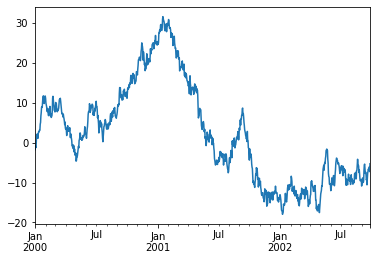

In [131]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [132]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [133]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

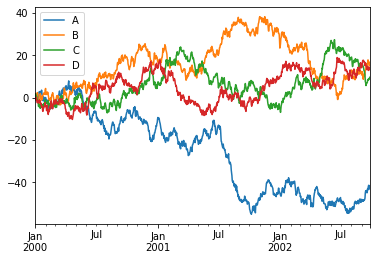

In [134]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [135]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [136]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.654555,-0.271471,0.575621,0.027351
1,2000-01-02,0.633079,-0.875198,1.773119,-0.277683
2,2000-01-03,1.814844,-0.546569,-0.365754,0.177026
3,2000-01-04,0.941051,0.266270,0.141619,-1.349738
4,2000-01-05,0.920302,0.638909,0.664417,-1.044856
...,...,...,...,...,...
995,2002-09-22,-41.447472,16.481969,8.430281,12.835696
996,2002-09-23,-41.900260,16.921889,8.906104,14.203095
997,2002-09-24,-41.597867,15.207750,9.207120,13.647840
998,2002-09-25,-42.786686,15.062353,8.958855,13.841984


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [137]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [138]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.654555,-0.271471,0.575621,0.027351
2000-01-02,0.633079,-0.875198,1.773119,-0.277683
2000-01-03,1.814844,-0.546569,-0.365754,0.177026
2000-01-04,0.941051,0.266270,0.141619,-1.349738
2000-01-05,0.920302,0.638909,0.664417,-1.044856
...,...,...,...,...
2002-09-22,-41.447472,16.481969,8.430281,12.835696
2002-09-23,-41.900260,16.921889,8.906104,14.203095
2002-09-24,-41.597867,15.207750,9.207120,13.647840
2002-09-25,-42.786686,15.062353,8.958855,13.841984


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [139]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [140]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.654555,-0.271471,0.575621,0.027351
1,2000-01-02,0.633079,-0.875198,1.773119,-0.277683
2,2000-01-03,1.814844,-0.546569,-0.365754,0.177026
3,2000-01-04,0.941051,0.266270,0.141619,-1.349738
4,2000-01-05,0.920302,0.638909,0.664417,-1.044856
...,...,...,...,...,...
995,2002-09-22,-41.447472,16.481969,8.430281,12.835696
996,2002-09-23,-41.900260,16.921889,8.906104,14.203095
997,2002-09-24,-41.597867,15.207750,9.207120,13.647840
998,2002-09-25,-42.786686,15.062353,8.958855,13.841984
